Fill valid code/values in place of blanks.

### Loading Libararies and Data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
# read train and test set
train = pd.read_csv("train_titanic.csv")
test = pd.read_csv("test_titanic.csv")

In [16]:
# combining train and test dataset
df = train.append(test, ignore_index=True)

In [17]:
# check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# remove Cabin variable
df.drop('Cabin', axis=1, inplace=True)

# fill missing values in Age and Embarked variables
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [19]:
# check missing values again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We have successfully imputed all the missing values. 

We will also remove the *Ticket*, *Name* and *PassengerId* variables as they don't seem to have any impact on the dependent variable.

In [20]:
# remove Ticket and Name variables
df.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

Now let's convert the categorical varialbles to numerical variables. 

In [21]:
from sklearn.preprocessing import LabelEncoder

# label enconding
label = LabelEncoder()

# label encode Embarked and Sex variables
df['Embarked_num'] = label.fit_transform(df['Embarked'])
df['Sex_num'] = label.fit_transform(df['Sex'])

# drop Embarked and Sex variables
df = df.drop(['Sex', 'Embarked'], axis = 1)

### Univariate Analysis

In [23]:
# see description of the dataframe df
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_num,Sex_num
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,1.536476,0.647587
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.791503,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000


Find count of unique values in the following variables

In [24]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [25]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [26]:
df['Sex_num'].value_counts()

1    577
0    314
Name: Sex_num, dtype: int64

Plot histogram of __Age__

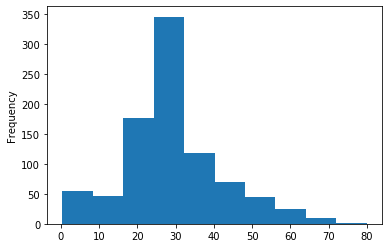

In [27]:
df['Age'].plot.hist()

Plot boxplot of __Age__

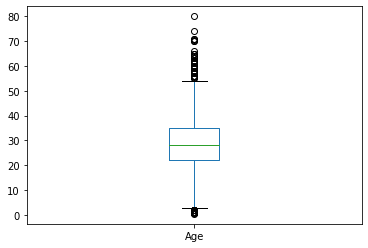

In [29]:
df['Age'].plot.box()

Plot histogram of __Fare__

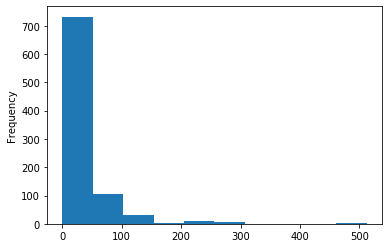

In [30]:
df['Fare'].plot.hist()

Plot boxplot of __Fare__

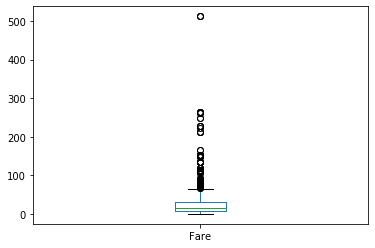

In [31]:
df['Fare'].plot.box()

### Bivariate Analysis

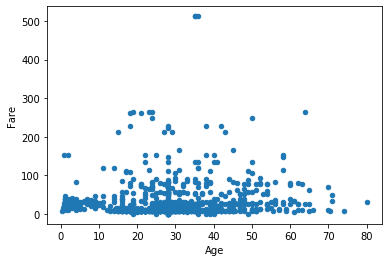

In [32]:
# scatter plot between Age and Fare
df.plot.scatter('Age', 'Fare')

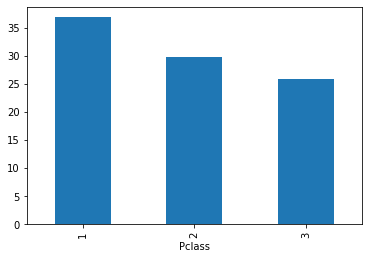

In [33]:
# bar plot between Pclass and mean Age
df.groupby('Pclass')['Age'].mean().plot.bar()

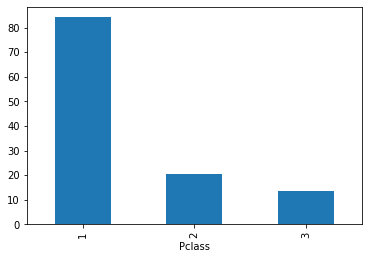

In [34]:
# bar plot between Pclass and mean Fare
df.groupby('Pclass')['Fare'].mean().plot.bar()

Let's split __df__ back to train and test set.

In [36]:
train = df[:len(train)]
test = df[len(train):]

true_val = test['Survived']

# delete Survived variable from test
test.drop(['Survived'], axis=1, inplace=True)

/home/jatin/.local/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Outlier Treatment

In [37]:
# remove rows where Fare is 400 or above
train = train[train['Fare']<400]

In [38]:
# Replace the outliers in Fare with its mean. The outliers are approximately above the value 62.
train.loc[train['Fare']>62, 'Fare'] = np.mean(train['Fare'])

Similarly, we will replace the outliers present in the Age variable.

In [39]:
# Replace the outliers in Agevariable with its median. The outliers are approximately above the value 55.
train.loc[train['Age']>55, 'Age'] = np.median(train['Age'])

### Modeling

In [40]:
# remove Survived from train
xtrain = train.drop('Survived', axis = 1)

ytrain = train['Survived']

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lreg = LogisticRegression()

In [44]:
# fit the logistic regression model lreg
lreg.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# make prediction on the test dataset 
pred = lreg.predict(test)

In [47]:
# evaluate the model lreg
lreg.score(test, true_val)

0.815028901734104